In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
file_path = "matchups_combined.csv"

In [34]:
matchups = pd.read_csv(file_path)

In [35]:
matchups.reset_index(drop=True, inplace=True)

In [36]:
matchups.head()

,Unnamed: 0,TEAM NO,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,BADJ EM_x,BADJ O_x,BADJ D_x,...,BARTHAG_x_o,BADJ EM_y_o,BADJ O_y_o,BADJ D_y_o,BARTHAG_y_o,YEAR_o,SEED_o,CURRENT ROUND_o,GAME ID_o,UPSET
0,0,1011,88.7,13.0,85.2,5.3,60.7,33.0,121.6,88.6,...,0.468,-2.0,102.4,104.4,0.445,2023,16,64,74,-1
1,1,979,80.2,6.7,86.7,5.8,59.9,20.8,118.1,97.3,...,0.914,17.6,114.8,97.2,0.871,2023,9,64,75,-1
2,2,961,87.5,7.8,75.0,5.4,61.5,25.7,113.8,88.1,...,0.819,9.4,108.1,98.7,0.740,2023,12,64,76,-1
3,3,946,89.7,9.4,81.5,5.2,60.6,19.3,110.8,91.5,...,0.640,9.5,112.6,103.1,0.734,2023,13,64,77,1
4,4,1001,94.7,10.4,78.9,4.3,63.6,26.3,115.7,89.4,...,0.840,15.2,113.0,97.8,0.840,2023,11,64,78,-1


In [37]:
matchups.drop(columns=["Unnamed: 0"], inplace=True)

In [38]:
rows_with_nan = matchups[matchups.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [TEAM NO, DUNKS FG%, DUNKS SHARE, DUNKS FG%D, DUNKS D SHARE, CLOSE TWOS FG%, BADJ EM_x, BADJ O_x, BADJ D_x, BARTHAG_x, BADJ EM_y, BADJ O_y, BADJ D_y, BARTHAG_y, YEAR, BY YEAR NO, BY ROUND NO, TEAM, SEED, ROUND, CURRENT ROUND, SCORE, GAME ID, OUTCOME, TEAM NO_o, DUNKS FG%_o, DUNKS SHARE_o, DUNKS FG%D_o, DUNKS D SHARE_o, CLOSE TWOS FG%_o, BADJ EM_x_o, BADJ O_x_o, BADJ D_x_o, BARTHAG_x_o, BADJ EM_y_o, BADJ O_y_o, BADJ D_y_o, BARTHAG_y_o, YEAR_o, SEED_o, CURRENT ROUND_o, GAME ID_o, UPSET]
Index: []

[0 rows x 43 columns]


In [39]:
X = matchups.drop(columns=['OUTCOME', "TEAM", "ROUND", "BY YEAR NO", "BY ROUND NO", "SCORE", "UPSET", "TEAM NO", "CURRENT ROUND_o", "TEAM NO_o", "GAME ID", "GAME ID_o", "YEAR_o"])
y = matchups['UPSET']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [43]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [55]:
def create_baseline():
    model = Sequential()
    model.add(Dense(128, input_shape=(30,), activation='relu'))
    model.add(Dense(128, input_shape=(128,), activation='relu'))
    model.add(Dense(64, input_shape=(128,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(model=create_baseline, epochs=400, batch_size=10, verbose=0)
estimator.fit(X_train, y_train)

KerasClassifier(
	model=<function create_baseline at 0x000001370F95B060>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=400
	class_weight=None
)

In [56]:
results = estimator.score(X_test, y_test)
print(results)

0.7621951219512195


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = ThreeLayerMLP(hidden_dim=128,
                              dropout_prob=0.0)

In [ ]:
train(model, X_train, y_train, X_val, y_val, lr=0.0001,
          batch_size=16, num_epochs=100)

c:\Users\17735\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\17735\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


InvalidIndexError: (0, slice(None, None, None))

In [14]:
X_train.shape

(654, 30)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [16]:
def create_baseline_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [17]:
# grid_search = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(X_train, y_train)

In [18]:
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [20]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return torch.sign(x)

In [21]:
def train_NN(model, criterion, optimizer, X_train, y_train, num_epochs=100):
    for epoch in range(num_epochs):
        inputs = torch.from_numpy(X_train).float()
        targets = torch.from_numpy(y_train).float()
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [23]:
np.random.seed(42)
input_size = 30
hidden_size = 5

model = NeuralNetwork(input_size, hidden_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

y_train = y_train.values.reshape(-1, 1)

train_NN(model, criterion, optimizer, X_train, y_train)

Epoch [10/100], Loss: 3.1358
Epoch [20/100], Loss: 3.1358
Epoch [30/100], Loss: 3.1358
Epoch [40/100], Loss: 3.1358
Epoch [50/100], Loss: 3.1358
Epoch [60/100], Loss: 3.1358
Epoch [70/100], Loss: 3.1358
Epoch [80/100], Loss: 3.1358
Epoch [90/100], Loss: 3.1358
Epoch [100/100], Loss: 3.1358


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
test_inputs = torch.from_numpy(X_test).float()
y_pred = model(test_inputs)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [112]:
print(test_predictions)

[[0.00951641]
 [0.00609006]
 [0.00696848]
 [0.0102385 ]
 [0.01221258]
 [0.00624028]
 [0.01551387]
 [0.01120417]
 [0.01255063]
 [0.01107905]
 [0.00798607]
 [0.01258259]
 [0.00660738]
 [0.00830946]
 [0.00697922]
 [0.02008639]
 [0.00730779]
 [0.00812393]
 [0.00750722]
 [0.01016658]
 [0.01010038]
 [0.01309676]
 [0.01128656]
 [0.00921994]
 [0.00685391]
 [0.01338949]
 [0.00690694]
 [0.01225213]
 [0.00766718]
 [0.00884771]
 [0.00701987]
 [0.00628808]
 [0.0083915 ]
 [0.01038788]
 [0.00891119]
 [0.01355849]
 [0.01155873]
 [0.00798309]
 [0.0081931 ]
 [0.00990274]
 [0.00995898]
 [0.00889685]
 [0.00851073]
 [0.01117069]
 [0.01378911]
 [0.01342402]
 [0.01110784]
 [0.01750607]
 [0.0082528 ]
 [0.0098368 ]
 [0.00984471]
 [0.00614973]
 [0.01081772]
 [0.00706888]
 [0.01166881]
 [0.00654483]
 [0.00621019]
 [0.00893396]
 [0.00621351]
 [0.00885075]
 [0.01131735]
 [0.01249632]
 [0.01027555]
 [0.00896223]
 [0.01373771]
 [0.00715913]
 [0.00834258]
 [0.01061673]
 [0.01441155]
 [0.01117294]
 [0.01333233]
 [0.00

In [82]:
import tensorflow.keras as keras
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from tensorflow.keras.layers import Dense, Input, Dropout, average, BatchNormalization, Activation
from tensorflow.keras.models import Model

In [83]:
display(X_train)

array([[0.75862069, 0.7388535 , 0.19256757, ..., 0.48701299, 0.54342105,
        0.8       ],
       [0.77155172, 0.46496815, 0.42567568, ..., 0.33766234, 0.82631579,
        0.46666667],
       [0.85344828, 0.68789809, 0.25337838, ..., 0.37012987, 0.83026316,
        0.46666667],
       ...,
       [0.77301484, 0.49781433, 0.46743152, ..., 0.33656025, 0.84725906,
        0.31020942],
       [0.63362069, 0.78343949, 0.53378378, ..., 0.38961039, 0.82894737,
        0.46666667],
       [0.83189655, 0.17834395, 0.57094595, ..., 0.50974026, 0.83289474,
        0.6       ]])

In [84]:
X_train.shape

(819, 30)

In [85]:
display(X_test)

array([[0.625     , 0.2611465 , 0.65540541, ..., 0.69480519, 0.45789474,
        0.93333333],
       [0.93103448, 0.50318471, 0.61148649, ..., 0.3538961 , 0.78421053,
        0.53333333],
       [0.81034483, 0.56687898, 0.80405405, ..., 0.31818182, 0.90657895,
        0.2       ],
       ...,
       [0.76724138, 0.64968153, 0.61824324, ..., 0.47727273, 0.89342105,
        0.06666667],
       [0.43103448, 0.23566879, 0.68581081, ..., 0.20454545, 0.93947368,
        0.06666667],
       [0.83189655, 0.40764331, 0.52364865, ..., 0.2987013 , 0.88552632,
        0.53333333]])

In [86]:
display(y_train)

137   -1
377    1
388   -1
824    1
767    1
      ..
106   -1
270    1
860    1
435    1
102   -1
Name: UPSET, Length: 819, dtype: int64

In [87]:
display(y_test)

86     1
431   -1
798   -1
497   -1
805   -1
      ..
209   -1
445   -1
762   -1
522   -1
519   -1
Name: UPSET, Length: 164, dtype: int64

In [88]:
print(y_test.count)

<bound method Series.count of 86     1
431   -1
798   -1
497   -1
805   -1
      ..
209   -1
445   -1
762   -1
522   -1
519   -1
Name: UPSET, Length: 164, dtype: int64>


In [89]:
def NN(neurons_per_layer, lr, reg_rate, num_hidden_layers):
    inputs = Input(shape=(30,))
    hidden = inputs
    for i in range(num_hidden_layers):
        hidden = Dense(neurons_per_layer, activation='relu', kernel_regularizer=l2(reg_rate))(hidden)
    outputs = Dense(1, activation='sigmoid')(hidden)
    optimizer = Adam(learning_rate=lr)
    model = Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [90]:
model = NN(128, 0.0001, 0.01, 2)

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))
test_loss, test_accuracy = model.evaluate(X_test, y_test)

Epoch 1/100
52/52 [==============================] - 1s 5ms/step - loss: 2.1307 - accuracy: 0.0000e+00 - val_loss: 1.9187 - val_accuracy: 0.0000e+00
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 1.8135 - accuracy: 0.0000e+00 - val_loss: 1.6848 - val_accuracy: 0.0000e+00
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 1.6257 - accuracy: 0.0000e+00 - val_loss: 1.5297 - val_accuracy: 0.0000e+00
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 1.4989 - accuracy: 0.0000e+00 - val_loss: 1.4031 - val_accuracy: 0.0000e+00
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 1.3839 - accuracy: 0.0000e+00 - val_loss: 1.3099 - val_accuracy: 0.0000e+00
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 1.2926 - accuracy: 0.0000e+00 - val_loss: 1.2142 - val_accuracy: 0.0000e+00
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 1.2110 - accuracy: 0.0000e+00 - v

In [64]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

6/6 [==============================] - 0s 2ms/step - loss: -132987486157668352.0000 - accuracy: 0.1768
Test Loss: -1.3298748615766835e+17, Test Accuracy: 0.1768292635679245


In [53]:
model = create_baseline_model()

In [46]:
best_model = grid_search.best_estimator_

In [51]:
import matplotlib.pyplot as plt

32/32 [==============================] - 1s 2ms/step - loss: 2.2728 - accuracy: 9.7656e-04


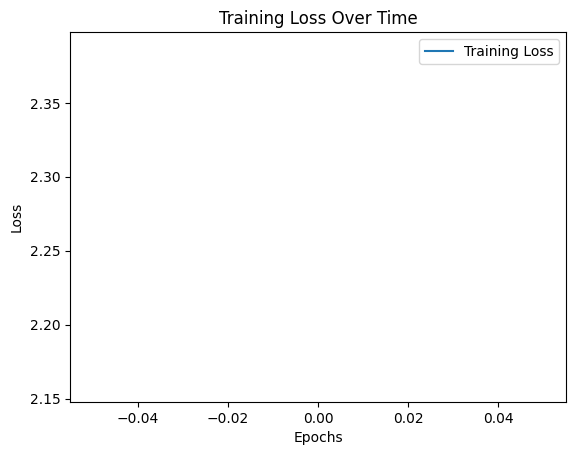

Test Accuracy: 0.7073170731707317


In [54]:
history = model.fit(X_train, y_train)

loss_values = history.history['loss']

plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)

print("Test Accuracy:", test_accuracy)

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7378048780487805
Classification Report:
              precision    recall  f1-score   support

          -1       0.85      0.82      0.84       135
           1       0.29      0.34      0.32        29

    accuracy                           0.74       164
   macro avg       0.57      0.58      0.58       164
weighted avg       0.75      0.74      0.75       164

Confusion Matrix:
[[111  24]
 [ 19  10]]


In [23]:
class NN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [56]:
def train_nn(X_train, y_train, X_val, y_val, params):
    input_dim = X_train.shape[1]
    output_dim = len(torch.unique(y_train))

    model = NN(input_dim, params['hidden_dim'], output_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

    for epoch in range(params['num_epochs']):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        outputs = model(X_val)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(predicted.numpy(), y_val.numpy())
    return accuracy

In [57]:
param_grid = {
    'hidden_dim': [5, 10, 20],
    'learning_rate': [0.001, 0.01, 0.1],
    'num_epochs': [50, 100, 200]
}

In [58]:
grid_search = GridSearchCV(estimator=train_nn, param_grid=param_grid, cv=3)
grid_search.fit(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train))

ValueError: could not determine the shape of object type 'DataFrame'

In [ ]:
best_params = grid_search.best_params_
best_accuracy = train_nn(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train),
                         torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val),
                         best_params)
print("Best hyperparameters:", best_params)
print("Validation accuracy with best hyperparameters:", best_accuracy)

In [ ]:
grid_search = GridSearchCV(estimator=train_nn, param_grid=param_grid, cv=3)
grid_search.fit(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train))

In [53]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

ValueError: Invalid parameter lr for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(lr=0.001)`
Check the list of available parameters with `estimator.get_params().keys()`

In [49]:
model.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

In [ ]:
# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

In [30]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score

In [41]:
keras_model = KerasClassifier(build_fn=nn_classifier, epochs=100, batch_size=32, verbose=0)

In [42]:
param_grid = {
    'neurons_per_layer': [32, 64, 128],
    'lr': [0.001, 0.01, 0.1],
    'reg_rate': [0.001, 0.01, 0.1],
    'num_hidden_layers': [1, 2, 3]
}

In [43]:
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


ValueError: Invalid parameter lr for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(lr=0.001)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
print("Best hyperparameters found:")
print(grid_search.best_params_)

In [ ]:
keras_model = KerasClassifier(build_fn=nn_classifier, epochs=100, batch_size=32, verbose=0)

In [ ]:
model = nn_classifier(neurons_per_layer=64, lr=0.001)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)